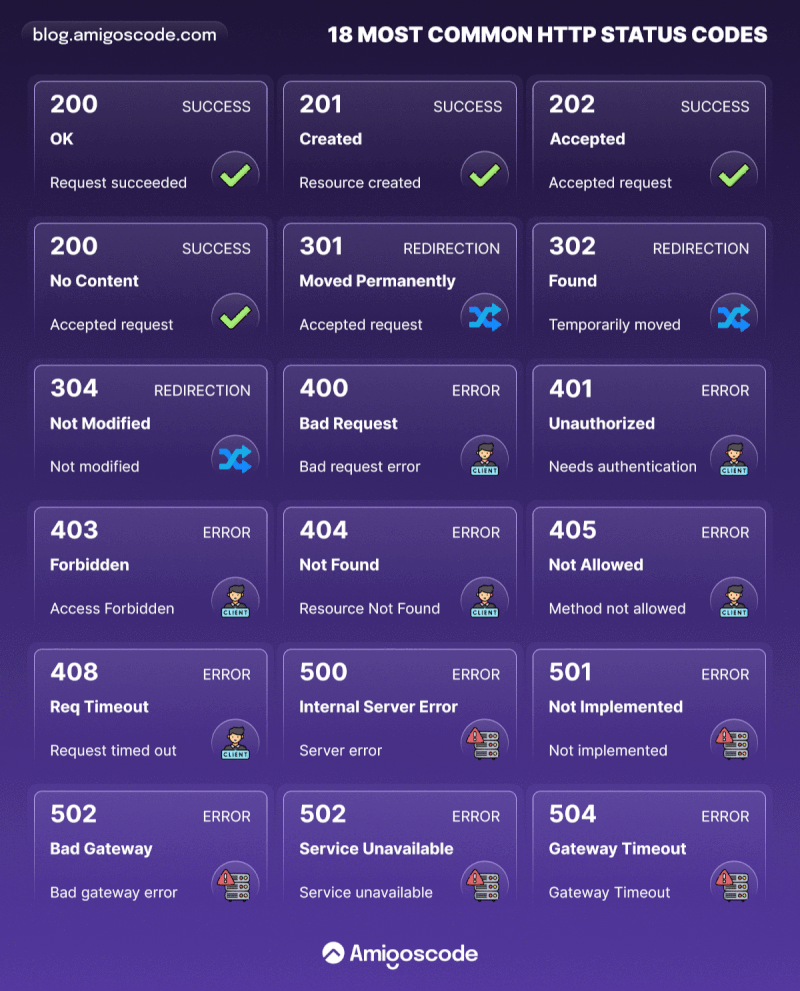

#Reinforcement Learning

Source: https://huggingface.co/tasks/reinforcement-learning

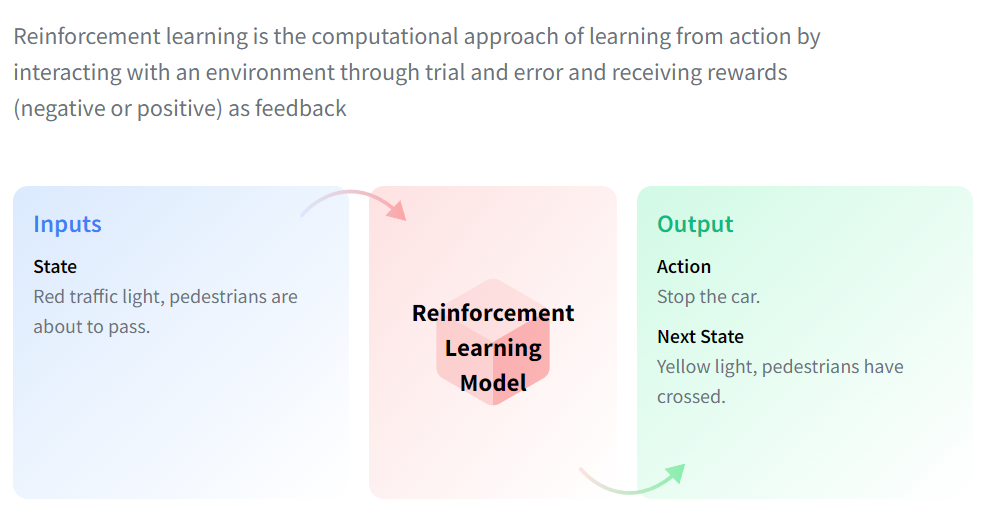

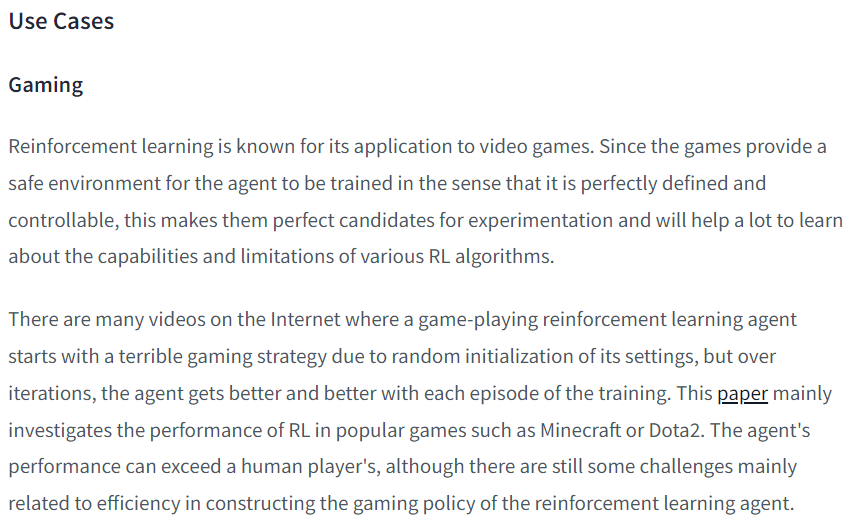

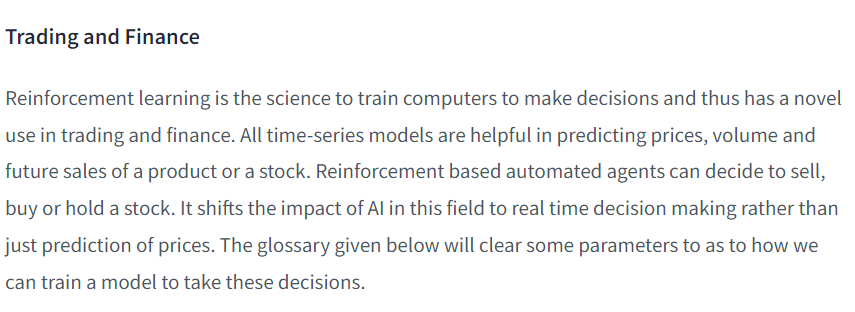

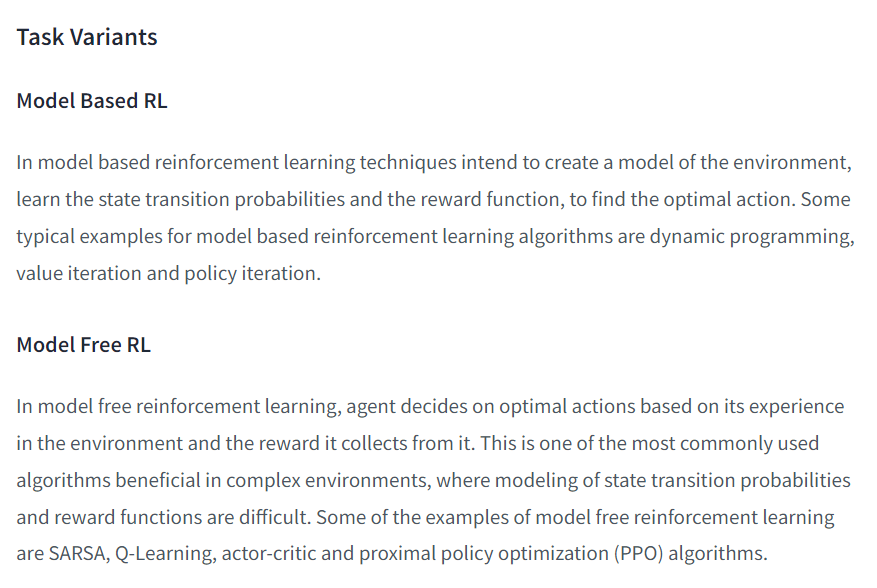

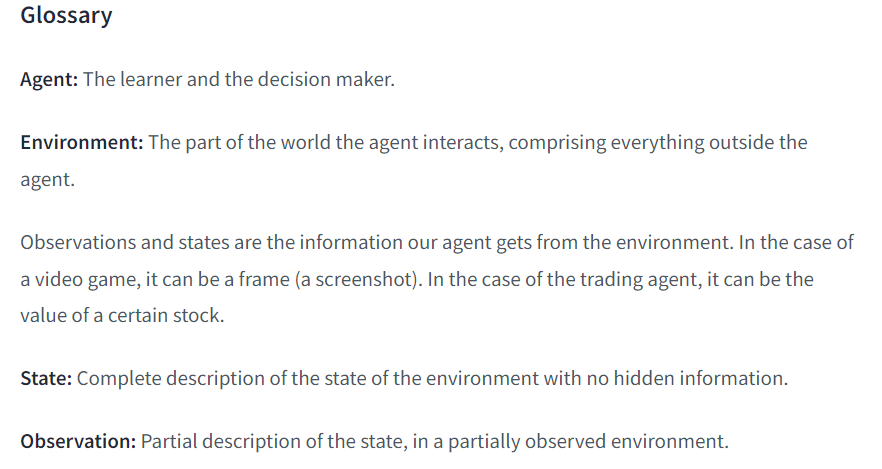

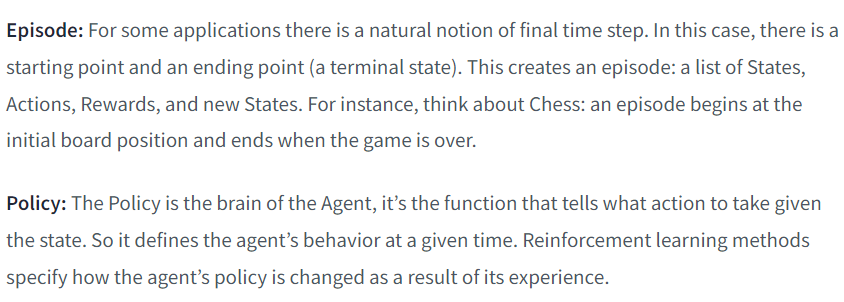

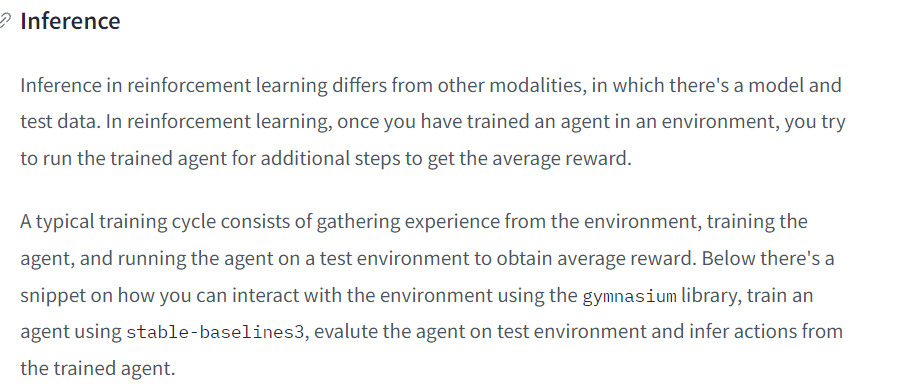

In [2]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 7.0 MB/s eta 0:00:00


In [4]:
# Here we are running 20 episodes of CartPole-v1 environment, taking random actions
import gymnasium as gym

env = gym.make("CartPole-v1")
observation, info = env.reset()

for _ in range(20):
    action = env.action_space.sample() # samples random action from action sample space
    print(action)

        # the agent takes the action
    observation, reward, terminated, truncated, info = env.step(action)


# if the agent reaches terminal state, we reset the environment
if terminated or truncated:

    print("Environment is reset")
    observation = env.reset()

env.close()

1
1
0
0
1
1
1
1
1
0
0
1
1
0
1
1
0
0
1
1
Environment is reset


/usr/local/lib/python3.10/dist-packages/gymnasium/envs/classic_control/cartpole.py:180: UserWarning: WARN: You are calling 'step()' even though this environment has already returned terminated = True. You should always call 'reset()' once you receive 'terminated = True' -- any further steps are undefined behavior.
  logger.warn(


In [ ]:
import gym
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class DDQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def train(self, state, action, reward, next_state, done):
        target = reward
        if not done:
            target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
        target_f = self.model.predict(state)
        target_f[0][action] = target
        self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

env = gym.make("CartPole-v1")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DDQNAgent(state_size, action_size)

episodes = 100
for episode in range(episodes):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0

    for time in range(500):
        env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.train(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if done:
            print("Episode: {}/{}, Total Reward: {}, Epsilon: {:.2}".format(
                episode + 1, episodes, total_reward, agent.epsilon))
            break

env.close()

In [10]:
import gym
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

class DDQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.gamma = 0.95  # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_size)
        q_values = self.model.predict(state)
        return np.argmax(q_values[0])

    def train(self, state, action, reward, next_state, done):
        target = reward
        if not done:
            target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
        target_f = self.model.predict(state)
        target_f[0][action] = target
        self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

env = gym.make("CartPole-v1")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = DDQNAgent(state_size, action_size)

episodes = 10
for episode in range(episodes):
    state = env.reset()
    state = np.reshape(state, [1, state_size])
    total_reward = 0

    for time in range(500):
        env.render()
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        next_state = np.reshape(next_state, [1, state_size])
        agent.train(state, action, reward, next_state, done)
        state = next_state
        total_reward += reward

        if done:
            print("Episode: {}/{}, Total Reward: {}, Epsilon: {:.2}".format(
                episode + 1, episodes, total_reward, agent.epsilon))
            break

env.close()

1/1 [==============================] - 0s 24ms/step
Episode: 1/10, Total Reward: 1.0, Epsilon: 0.94
1/1 [==============================] - 0s 23ms/step
Episode: 2/10, Total Reward: 9.0, Epsilon: 0.85
1/1 [==============================] - 0s 23ms/step
Episode: 3/10, Total Reward: 16.0, Epsilon: 0.74
1/1 [==============================] - 0s 25ms/step
Episode: 4/10, Total Reward: 25.0, Epsilon: 0.62
1/1 [==============================] - 0s 32ms/step
Episode: 5/10, Total Reward: 2.0, Epsilon: 0.58
1/1 [==============================] - 0s 24ms/step
Episode: 6/10, Total Reward: 4.0, Epsilon: 0.54
1/1 [==============================] - 0s 26ms/step
Episode: 7/10, Total Reward: 5.0, Epsilon: 0.5
1/1 [==============================] - 0s 25ms/step
Episode: 8/10, Total Reward: 3.0, Epsilon: 0.46
1/1 [==============================] - 0s 21ms/step
Episode: 9/10, Total Reward: 0.0, Epsilon: 0.44
1/1 [==============================] - 0s 24ms/step
Episode: 10/10, Total Reward: 2.0, Epsilon: 0.4

In [20]:
import gym
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

class DDPGAgent:
    def __init__(self, state_dim, action_dim, action_high):
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.action_high = action_high
        self.action_low = -action_high
        self.gamma = 0.99  # discount factor
        self.tau = 0.001  # for soft target network updates
        self.actor_lr = 0.001
        self.critic_lr = 0.002

        # Actor and critic networks
        self.actor = self.build_actor()
        self.target_actor = self.build_actor()
        self.critic = self.build_critic()
        self.target_critic = self.build_critic()

        # Compile actor and critic networks
        self.actor.compile(optimizer=Adam(lr=self.actor_lr), loss='mse')
        self.critic.compile(optimizer=Adam(lr=self.critic_lr), loss='mse')

        # Make the target actor and critic identical to actor and critic
        self.update_target_networks(tau=1.0)

    def build_actor(self):
        state_input = Input(shape=(self.state_dim,))
        x = Dense(64, activation='relu')(state_input)
        x = Dense(64, activation='relu')(x)
        output = Dense(self.action_dim, activation='tanh')(x)
        output = output * self.action_high
        model = Model(inputs=state_input, outputs=output)
        return model

    def build_critic(self):
        state_input = Input(shape=(self.state_dim,))
        action_input = Input(shape=(self.action_dim,))
        x = Concatenate()([state_input, action_input])
        x = Dense(64, activation='relu')(x)
        x = Dense(64, activation='relu')(x)
        output = Dense(1)(x)
        model = Model(inputs=[state_input, action_input], outputs=output)
        return model

    def update_target_networks(self, tau=None):
        if tau is None:
            tau = self.tau
        weights = []
        targets = self.target_actor.weights + self.target_critic.weights
        for i, weight in enumerate(self.actor.weights + self.critic.weights):
            weights.append(tau * weight + (1 - tau) * targets[i])
        self.target_actor.set_weights(weights[:len(self.actor.weights)])
        self.target_critic.set_weights(weights[len(self.actor.weights):])

    def get_action(self, state):
        state = np.reshape(state, [1, self.state_dim])
        action = self.actor.predict(state)
        return action[0]

    def train(self, states, actions, rewards, next_states, dones):
        next_actions = self.target_actor.predict(next_states)
        next_q_values = self.target_critic.predict([next_states, next_actions])
        target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        self.critic.train_on_batch([states, actions], target_q_values)

        with tf.GradientTape() as tape:
            pred_actions = self.actor(states)
            actor_loss = -tf.reduce_mean(self.critic([states, pred_actions]))
        actor_grads = tape.gradient(actor_loss, self.actor.trainable_variables)
        self.actor.optimizer.apply_gradients(zip(actor_grads, self.actor.trainable_variables))

        self.update_target_networks()

# Example usage:
env = gym.make("Pendulum-v1")
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
action_high = env.action_space.high[0]

agent = DDPGAgent(state_dim, action_dim, action_high)

episodes = 10
for episode in range(episodes):
    state = env.reset()
    total_reward = 0

    for time in range(500):
        env.render()
        action = agent.get_action(state)
        next_state, reward, done, _ = env.step(action)
        reward = reward if not done else -10
        agent.train(np.array([state]), np.array([action]), np.array([reward]), np.array([next_state]), np.array([done]))
        state = next_state
        total_reward += reward

        if done:
            print("Episode: {}/{}, Total Reward: {}".format(episode + 1, episodes, total_reward))
            break

env.close()


Se han truncado las últimas 5000 líneas del flujo de salida.
1/1 [==============================] - 0s 31ms/step
Episode: 2/10, Total Reward: -1554.7705680277616
1/1 [==============================] - 0s 38ms/step
Episode: 3/10, Total Reward: -1464.1393266534633
1/1 [==============================] - 0s 25ms/step
Episode: 4/10, Total Reward: -974.5612215520141
1/1 [==============================] - 0s 24ms/step
Episode: 5/10, Total Reward: -1807.6874849908015
1/1 [==============================] - 0s 24ms/step
Episode: 6/10, Total Reward: -1176.0349265257935
1/1 [==============================] - 0s 26ms/step
Episode: 7/10, Total Reward: -1287.6587936990359
1/1 [==============================] - 0s 29ms/step
Episode: 8/10, Total Reward: -1468.4896410077602
1/1 [==============================] - 0s 32ms/step
Episode: 9/10, Total Reward: -1309.1812427912719
1/1 [==============================] - 0s 31ms/step
Episode: 10/10, Total Reward: -1305.0337735646758
